In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

pd.set_option('max_colwidth', 120) 
pd.set_option('display.width', 500)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

df = pd.read_csv('main_task.xls')

In [ ]:
df.info()

In [ ]:
df.sample(3)

---------

# Population

In [ ]:
# Создам словарь с городами и населением в них (в тыс. человек)
population_in_the_сity = {'Paris': 2148, 'Stockholm': 961, 'London': 8908, 'Berlin': 3644, 'Munich': 1471, 'Oporto': 237,
                          'Milan': 1378, 'Bratislava': 437, 'Vienna': 1897, 'Rome': 2870, 'Barcelona': 1664, 'Madrid': 3266,
                          'Dublin': 1173, 'Brussels': 179, 'Zurich': 428, 'Warsaw': 1790, 'Budapest': 1752, 'Copenhagen': 615,
                          'Amsterdam': 872, 'Lyon': 506, 'Hamburg': 1841, 'Lisbon': 505, 'Prague': 1301, 'Oslo': 673,
                          'Helsinki': 655, 'Edinburgh': 488, 'Geneva': 200, 'Ljubljana': 284, 'Athens': 664,
                          'Luxembourg': 115, 'Krakow': 779}

In [ ]:
df['Population'] = df['City'].apply(lambda x: population_in_the_сity[x])  # Создание столбца с населением в городе

-----------

# City square

In [ ]:
# Создам словарь с городами и их площадью (в кв. км)
city_square = {'Paris': 105.4, 'Stockholm': 188, 'London': 1572, 'Berlin': 891.68, 'Munich': 310.71, 'Oporto': 41.66,
               'Milan': 181.67, 'Bratislava': 368, 'Vienna': 414.75, 'Rome': 1287.36, 'Barcelona': 101.3, 'Madrid': 607,
               'Dublin': 318, 'Brussels': 32.61, 'Zurich': 91.88, 'Warsaw': 517, 'Budapest': 525.14, 'Copenhagen': 86.40,
               'Amsterdam': 219.4, 'Lyon': 47.87, 'Hamburg': 755.09, 'Lisbon': 100.05, 'Prague': 500, 'Oslo': 454,
               'Helsinki': 213.8, 'Edinburgh': 118, 'Geneva': 15.93, 'Ljubljana': 163.8, 'Athens': 412,
               'Luxembourg': 51.47, 'Krakow': 327}

In [ ]:
df['Сity square'] = df['City'].apply(lambda x: city_square[x])  # Создание столбца с площадью города

------------

# Population density

In [ ]:
# Создам словарь с городами плотностью населения в них (в тыс. человек)
population_density = {'Paris': 20 781, 'Stockholm': 5139.7, 'London': 5667, 'Berlin': 3644, 'Munich': 1471, 'Oporto': 237,
                          'Milan': 1378, 'Bratislava': 437, 'Vienna': 1897, 'Rome': 2870, 'Barcelona': 1664, 'Madrid': 3266,
                          'Dublin': 1173, 'Brussels': 179, 'Zurich': 428, 'Warsaw': 1790, 'Budapest': 1752, 'Copenhagen': 615,
                          'Amsterdam': 872, 'Lyon': 506, 'Hamburg': 1841, 'Lisbon': 505, 'Prague': 1301, 'Oslo': 673,
                          'Helsinki': 655, 'Edinburgh': 488, 'Geneva': 200, 'Ljubljana': 284, 'Athens': 664,
                          'Luxembourg': 602, 'Krakow': 779}

In [ ]:
df['Population density'] = df['City'].apply(lambda x: population_density[x])  # Создание столбца с плотностью населения в городе

----------

# Cuisine Style

In [ ]:
df['Cuisine Style'] = df['Cuisine Style'].fillna('[]')
df['Cuisine Style'] = df['Cuisine Style'].apply(lambda x: x.replace('[','').replace(']','').replace("'", '').replace(' ',''))
df['Cuisine Style'] = df['Cuisine Style'].apply(lambda x: x.split(','))
df['Number of kitchen'] = df['Cuisine Style'].apply(lambda x: len(x))

# Дополнительно к кухням

In [ ]:
df.sample(3)

In [ ]:
#df['middle_east'] = 0
#df['africa'] = 0
#df['asia'] = 0
#df['europe'] = 0
#df['n_america'] = 0
#df['s_america'] = 0
#df['australia_and_islands'] = 0

In [ ]:
#df['africa'] = df['Cuisine Style'].apply(lambda x: 1 if for i in x: in africa else 0)

In [ ]:
#def ASD():
 #   for i in df['Cuisine Style']:
  #      for j in i:
   #         if j in africa:
    #            return True

In [ ]:
#cuisine = set()

In [ ]:
#for i in df['Cuisine Style']:
 #   for j in i:
  #      cuisine.add(j)

In [ ]:
#display(cuisine)

In [ ]:
middle_east = ['Afghani', 'Arabic', 'Armenian', 'Azerbaijani', 'Caucasian', 'Georgian', 'Lebanese', 'MiddleEastern',
               'Pakistani', 'Persian', 'Turkish', 'Uzbek']
africa = ['African', 'Egyptian', 'Ethiopian', 'Moroccan', 'Tunisian']
asia = ['Asian', 'Bangladeshi', 'Burmese', 'Cambodian', 'CentralAsian', 'Chinese', 'Fujian', 'Indian', 'Japanese', 'Korean',
        'MinorityChinese',  'Mongolian', 'Nepali', 'Singaporean', 'SriLankan', 'Sushi', 'Taiwanese', 'Thai', 'Tibetan',
        'Vietnamese', 'Xinjiang', 'Yunnan']
europe = ['Albanian', 'Austrian', 'Balti', 'Belgian', 'British', 'CentralEuropean', 'Croatian', 'Czech', 'Danish', 'Dutch',
          'EasternEuropean', 'European', 'French', 'German', 'Greek', 'Hungarian', 'Irish', 'Israeli', 'Italian', 'Latvian',
          'Mediterranean', 'Norwegian', 'Polish', 'Portuguese', 'Romanian', 'Russian', 'Scandinavian', 'Scottish', 'Slovenian',
          'Spanish', 'Swedish', 'Swiss', 'Ukrainian', 'Welsh']
n_america = ['American', 'Canadian', 'Caribbean', 'CentralAmerican', 'Cuban', 'Jamaican', 'Latin', 'Mexican', 'NativeAmerican',
             'Salvadoran', 'SouthAmerican', 'Southwestern']
s_america = ['Argentinean', 'Brazilian', 'Chilean',
             'Colombian', 'Ecuadorean', 'Peruvian', 'Venezuelan']
australia_and_islands = ['Australian', 'Hawaiian', 'Filipino',
                         'Indonesian', 'Malaysian', 'NewZealand', 'Polynesian']

In [ ]:
#def create_cuisine(name, region):
#    df[name] = df['Cuisine Style'].apply(lambda x: 1 if x in region else 0)

----------

# Price Range

In [ ]:
df['Price Range'].value_counts()

In [ ]:
df['Price Range'] = df['Price Range'].fillna('$$ - $$$')
#df['Price Range'] = df['Price Range'].apply(lambda x: 1 if x == '$' else 2.5 if x == '$$ - $$$' else 4)

In [ ]:
price_df = pd.get_dummies(df['Price Range'])  # Делаем дамми-признаки цен
price_df.sample(3)

In [ ]:
df = pd.concat([df, price_df], axis=1)  # Добавляем дамми-цены в таблицу
df.sample(3)

---------

# Reviews

In [2]:
df['Two_reviews'] = df['Reviews'].apply(lambda x: x.split('],')[0])
df['Two_reviews'] = df['Two_reviews'].apply(lambda x: x.split("',"))
df['Review_1'] = df['Two_reviews'].apply(lambda x: x[0])
df['Review_1'] = df['Review_1'].apply(lambda x: x.replace('[','').replace("'", ''))

In [3]:
df['Review_2'] = df['Two_reviews'].apply(lambda x: x[-1])
df['Review_2'] = df['Review_2'].apply(lambda x: x.replace('[','').replace("'", ''))

# Удалим повторы, если отзыв был один и он продублировался в столбец Review_2
for i in range(len(df)):
    if df['Review_1'][i] == df['Review_2'][i]:
        df['Review_2'][i] = ''

-----------

# Days

In [4]:
df['Days_reviews'] = df['Reviews'].apply(lambda x: x.split('],')[-1])
df['Days_reviews'] = df['Days_reviews'].apply(lambda x: x.split("',"))
df['Day_1'] = df['Days_reviews'].apply(lambda x: x[0])
df['Day_1'] = df['Day_1'].apply(lambda x: x.replace('[','').replace("'", '').replace(']', '').replace(' ', ''))

In [5]:
df['Day_2'] = df['Days_reviews'].apply(lambda x: x[-1])
df['Day_2'] = df['Day_2'].apply(lambda x: x.replace('[','').replace("'", '').replace(']', '').replace(' ', ''))
# Удалим вторую дату, если отзыв был один
for i in range(len(df)):
    if df['Review_2'][i] == '':
        df['Day_2'][i] = '' 

In [6]:
df[['Reviews', 'Review_1', 'Review_2', 'Day_1', 'Day_2']].sample(3)

,Reviews,Review_1,Review_2,Day_1,Day_2
18011,"[['Exactly what I wanted', '""What an Indian Restaurant Should Be like""'], ['10/18/2017', '01/05/2018']]",Exactly what I wanted,"""What an Indian Restaurant Should Be like""",10/18/2017,01/05/2018
6305,"[['Good service', 'Worst service ever'], ['08/22/2017', '09/18/2017']]",Good service,Worst service ever,08/22/2017,09/18/2017
24221,"[[], []]",,,,


In [8]:
df['Day_1'] = df['Day_1'].apply(lambda x: x if len(x) == 0 else datetime.strptime(x, '%m/%d/%Y'))
df['Day_2'] = df['Day_2'].apply(lambda x: x if len(x) == 0 else datetime.strptime(x, '%m/%d/%Y'))

In [12]:
df['Day1_2'] = df['Day_1'] - df['Day_2']

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

TypeError: float() argument must be a string or a number, not 'NoneType'

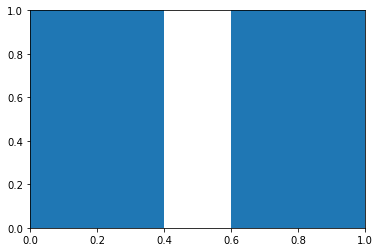

In [27]:
df['Day1_2']

-----------

# Тональный анализ

In [ ]:
#Установка и подключение необходимой библиотеки
#conda install -c conda-forge textblob

from textblob import TextBlob

In [ ]:
df['Review_1'] = df['Review_1'].apply(lambda x: TextBlob(x).polarity)

In [ ]:
df['Review_2'] = df['Review_2'].apply(lambda x: TextBlob(x).polarity)

In [ ]:
#df['Two_reviews'] = (df['Review_1']+df['Review_2'])/2

In [ ]:
df.sample(3)

In [ ]:
#for i in range(30):
#    sentence = df.Words[i]
#    analysis = TextBlob(sentence).sentiment
#    print(df.Words[i])
#    print(analysis)
#    print()

In [ ]:
#import nltk
#nltk.download('movie_reviews')

In [ ]:
a = '[[Good food at your doorstep'
TextBlob(a).sentiment

In [ ]:
#from textblob.sentiments import NaiveBayesAnalyzer

 -------

In [ ]:
init_notebook_mode(connected = True)
cf.go_offline()

In [ ]:
df['Price Range'].iplot()

-------

# City

In [ ]:
df.City.unique()  # Список всех городов

In [ ]:
city_df = pd.get_dummies(df.City)  # Делаем дамми-признаки всех городов
city_df.sample(3)

In [ ]:
df = pd.concat([df, city_df], axis=1)  # Добавляем дамми-города в таблицу

------------

# Удаление и сбор данных

In [ ]:
df.sample(3)

In [ ]:
#df = df.drop(['Restaurant_id', 'City', 'Cuisine Style', 'Price Range', 'Reviews', 'URL_TA', 'ID_TA', 'Two_reviews',
#              'Review_1', 'Review_2'], axis = 1)
df = df.drop(['Restaurant_id', 'City', 'Price Range', 'Cuisine Style', 'Reviews', 'URL_TA', 'ID_TA', 'Two_reviews'], axis = 1)
df = df.fillna(0)

In [ ]:
df.sample(3)

In [ ]:
X = df.drop(['Rating'], axis = 1)  
y = df['Rating'] 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [ ]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [ ]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

In [ ]:
# Результаты:
# Цена заменена на 2.5 или на $$-$$$
# Население, дамми-города, кол. кухонь, цены в столбце 0.212993
# Население, дамми-города, кол. кухонь, дамми-цены 0.21267799999999998
# Население, дамми-города, кол.кухонь, две рецензии 0.2092545
# Население, дамми-города, кол.кухонь, две рецензии, дамми-цены 0.20769 (0.212815)
# Население, дамми-города, кол.кухонь, две рецензии, цены в столбце 0.21114349999999998
# Население, дамми-города, кол.кухонь, одна средняя рецензия 0.212187
# Население, дамми-города, кол.кухонь, одна средняя рецензия, дамми-цены 0.21217249999999999
# Население, дамми-города, кол.кухонь, одна средняя рецензия, цены в столбце 0.21305249999999995